#                     EJERCICIO DE REGRESION LINEAL 

In [1]:
import scipy as sp

data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t") # Ruta donde se carga el data set
print(data[:10])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743L, 2L)


## Limpiando el data set

In [2]:
x = data[:, 0]
y = data[:, 1]

## Numero de entradas invalidas (nan)

In [3]:
print("Number of invalid entries:", sp.sum(sp.isnan(y)))
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

('Number of invalid entries:', 8)


# Preparando datos para graficar un modelo

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(x, y, s):
    plt.scatter(x, y, s=s)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(20)])
    plt.autoscale(tight=True)
    plt.grid()
    plt.show()
    
def plot_model(f, linestyle, linewidth, color):
    fx = sp.linspace(0, x[-1], 1000)
    plt.plot(fx, f(fx), linestyle=linestyle, linewidth=linewidth, c=color)
    plt.legend(["model d=%i" % f.order], loc="upper left")

## Grafica de  datos con respecto al problema anterior

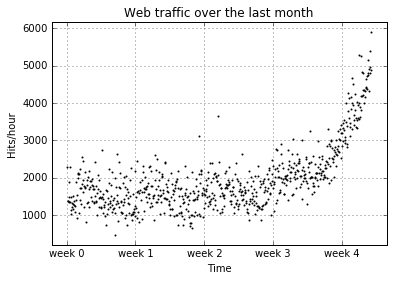

In [5]:
#plot_model(f1,'-', 2, 'g')
plot_data(x, y, s=1)

In [6]:
inflection = 3.5 * 7 * 24
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

#plot_models(x, y, [fa, fb])


C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [7]:
print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))



Trained only on data after inflection point


C:\Users\User\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\User\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\User\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


## Separando los datos de prueba

In [8]:
# separating training from testing data
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))

test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))



## Predicción

In [9]:
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

         2
0.08536 x - 92.97 x + 2.701e+04
         2
0.08536 x - 92.97 x - 7.299e+04
100,000 hits/hour expected at week 9.629180


In [10]:
# create and plot models: Polynomial of degree = 2
fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True)
print("Model parameters of fp1: %s" % fp2)
print("Error of the model of fp1:", res2)

f2 = sp.poly1d(fp2)
print ("f(x): %s" % f2)
#print ("Error: ", error(f2, x, y))

#plot_model(f1, '-', 2, 'g') # Model 1
#plot_model(f2, '-', 2, 'b') # Model 2
#plot_data(x, y, s=1)


Model parameters of fp1: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
('Error of the model of fp1:', array([  1.79983508e+08]))
f(x):          2
0.01053 x - 5.265 x + 1975


In [11]:
#Funcion 
def plot_models(x, y, models, mx=None, ymax=None, xmin=None):
    
    colors = ['g', 'r', 'b', 'm', 'k']
    linestyles = ['-', '-', '--', ':', '-']

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=1)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(20)], ['week %i' % w for w in range(20)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["model d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')

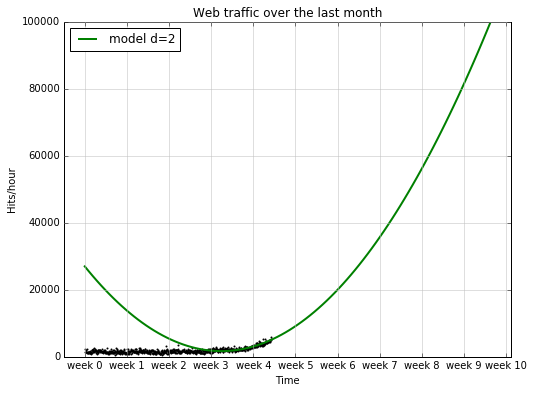

In [12]:
# extrapolating into the future
plot_models(
    x, y, [fbt2],
    mx=sp.linspace(0, reached_max[0] * 7 * 24, 100),
    ymax=100000, xmin=0)

De la gráfica anterior se puede inferir que entre las semanas 9 y 10 habrán 100.000 visitas